Import packages

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [2]:
data = pd.read_csv("data/engineered_morality.csv")
data.columns

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_4559/1586172768.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/engineered_morality.csv")


Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'created', 'author', 'score',
       'num_comments', 'link', 'cleaned_text', 'word_count', 'type', 'link_id',
       'year', 'month', 'Segment_1', 'emo_pos', 'emo_neg', 'emo_anx',
       'emo_anger', 'emo_sad', 'moral', 'Segment', 'Care_Virtue', 'Care_Vice',
       'Fairness_Virtue', 'Fairness_Vice', 'Loyalty_Virtue', 'Loyalty_Vice',
       'Authority_Virtue', 'Authority_Vice', 'Sanctity_Virtue',
       'Sanctity_Vice', 'Care_total', 'Fairness_total', 'Loyalty_total',
       'Authority_total', 'Sanctity_total', 'Virtue_total', 'Vice_total',
       'Foundations_total_score', 'Subreddit'],
      dtype='object')

In [12]:
selfimprovement = data[data.Subreddit == "selfimprovement"]
investing = data[data.Subreddit == "investing"]
homeowners = data[data.Subreddit == "homeowners"]

# Is moral language present in discussions about self-improvement? (Analyses with LIWC moral dimension)

### Basic descriptive statistics

In [8]:
selfimprovement.moral.describe()

count    507516.000000
mean          0.320543
std           0.688991
min           0.000000
25%           0.000000
50%           0.000000
75%           0.380000
max          14.810000
Name: moral, dtype: float64

In [9]:
investing.moral.describe()

count    504192.000000
mean          0.191849
std           0.545491
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.110000
Name: moral, dtype: float64

In [10]:
homeowners.moral.describe()

count    502533.000000
mean          0.154164
std           0.491306
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.890000
Name: moral, dtype: float64

### Compare distributions at the top

In [61]:
percentiles = [25, 50, 75, 80, 85, 90, 95, 99]

# Calculate percentiles for each subreddit
selfimpr_p = np.percentile(selfimprovement.moral, percentiles)
investing_p = np.percentile(investing.moral, percentiles)
homeowners_p = np.percentile(homeowners.moral, percentiles)

# Put results on a df
percentiles_table = pd.DataFrame({
    'Percentile': percentiles,
    'Self-Improvement': selfimpr_p,
    'Investing': investing_p,
    'Homeowners': homeowners_p
})

percentiles_table = percentiles_table.round(3)

print(percentiles_table)


   Percentile  Self-Improvement  Investing  Homeowners
0          25              0.00      0.000        0.00
1          50              0.00      0.000        0.00
2          75              0.38      0.000        0.00
3          80              0.60      0.000        0.00
4          85              0.85      0.330        0.00
5          90              1.19      0.840        0.62
6          95              1.69      1.410        1.25
7          99              3.17      2.381        2.00


## Observe with only the top 75 percentile of the data

In [50]:
selfimprovement_75 = selfimprovement['moral'].quantile(0.75)
investing_75 = investing['moral'].quantile(0.75)
homeowners_75 = homeowners['moral'].quantile(0.75)

In [51]:
selfimprovement_upperbound = selfimprovement[selfimprovement.moral >= selfimprovement_75]
investing_upperbound = investing[investing.moral >= investing_75]
homeowners_upperbound = homeowners[homeowners.moral >= homeowners_75]

Sizes

In [52]:
print("selfimprovement:", selfimprovement_upperbound.shape)
print("investing:", investing_upperbound.shape)
print("homeowners:", homeowners_upperbound.shape)

selfimprovement: (126998, 41)
investing: (504192, 41)
homeowners: (502533, 41)


Means and St deviation

In [58]:
selfimprovement_stats = selfimprovement_upperbound["moral"].describe().loc[['mean', 'std']]
investing_stats = investing_upperbound["moral"].describe().loc[['mean', 'std']]
homeowners_stats = homeowners_upperbound["moral"].describe().loc[['mean', 'std']]

print("Self-Improvement Upperbound Stats:\n", selfimprovement_stats)
print("\nInvesting Upperbound Stats:\n", investing_stats)
print("\nHomeowners Upperbound Stats:\n", homeowners_stats)


Self-Improvement Upperbound Stats:
 mean    1.238553
std     0.872679
Name: moral, dtype: float64

Investing Upperbound Stats:
 mean    0.191849
std     0.545491
Name: moral, dtype: float64

Homeowners Upperbound Stats:
 mean    0.154164
std     0.491306
Name: moral, dtype: float64


See density

/Users/natashacarpcast/anaconda3/envs/macs30112/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


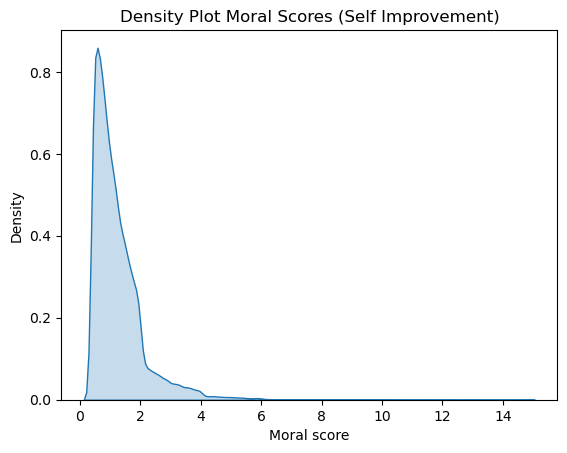

In [53]:
sns.kdeplot(selfimprovement_upperbound.moral, fill=True)
plt.title('Density Plot Moral Scores (Self Improvement)')
plt.xlabel('Moral score')
plt.ylabel('Density')
plt.show()

/Users/natashacarpcast/anaconda3/envs/macs30112/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


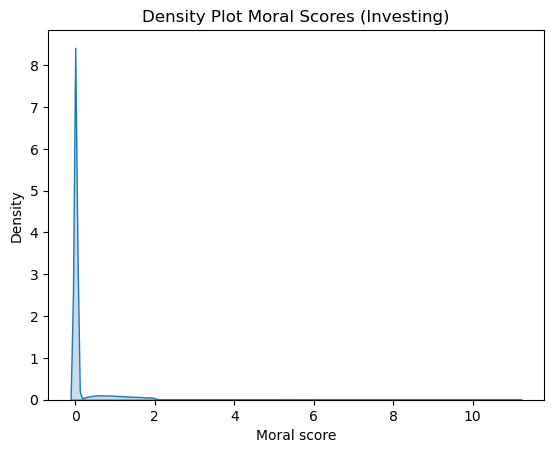

In [54]:
sns.kdeplot(investing_upperbound.moral, fill=True)
plt.title('Density Plot Moral Scores (Investing)')
plt.xlabel('Moral score')
plt.ylabel('Density')
plt.show()

/Users/natashacarpcast/anaconda3/envs/macs30112/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


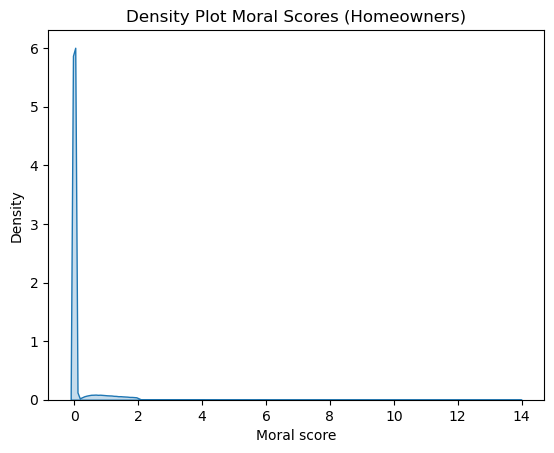

In [56]:
sns.kdeplot(homeowners_upperbound.moral, fill=True)
plt.title('Density Plot Moral Scores (Homeowners)')
plt.xlabel('Moral score')
plt.ylabel('Density')
plt.show()

Kruskall Wallis

In [59]:
h_stat, p_value = stats.kruskal(selfimprovement_upperbound.moral, homeowners_upperbound.moral, investing_upperbound.moral)
print("H-statistic:", h_stat)
print(f"p-value: {p_value:.2e}")

H-statistic: 441342.01034925523
p-value: 0.00e+00


Mann Whitney U

In [60]:
# One-tailed test: selfimprovement > homeowners
u_stat, p_value = stats.mannwhitneyu(selfimprovement_upperbound.moral, homeowners_upperbound.moral, alternative='greater')
print(f"Selfimprovement vs Homeowners p-value (greater): {p_value:.2e}")

# One-tailed test: selfimprovement > investing
u_stat, p_value = stats.mannwhitneyu(selfimprovement_upperbound.moral, investing_upperbound.moral, alternative='greater')
print(f"Selfimprovement vs Investing p-value (greater): {p_value:.2e}")

Selfimprovement vs Homeowners p-value (greater): 0.00e+00
Selfimprovement vs Investing p-value (greater): 0.00e+00


## Observe when dropping zero values

In [62]:
selfimprovement_nonzero = selfimprovement[selfimprovement.moral != 0]
investing_nonzero = investing[investing.moral != 0]
homeowners_nonzero = homeowners[homeowners.moral != 0]

Check data sizes

In [63]:
print("selfimprovement:", selfimprovement_nonzero.shape[0])
print("investing:", investing_nonzero.shape[0])
print("homeowners:", homeowners_nonzero.shape[0])

selfimprovement: 147423
investing: 81762
homeowners: 65592


/Users/natashacarpcast/anaconda3/envs/macs30112/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


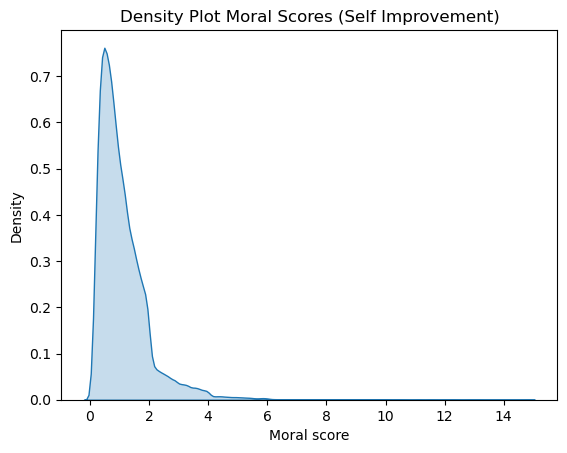

In [66]:
sns.kdeplot(selfimprovement_nonzero.moral, fill=True)
plt.title('Density Plot Moral Scores (Self Improvement)')
plt.xlabel('Moral score')
plt.ylabel('Density')
plt.show()

/Users/natashacarpcast/anaconda3/envs/macs30112/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


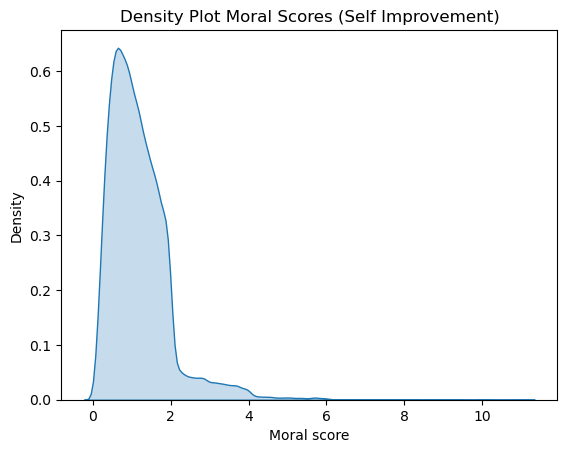

In [67]:
sns.kdeplot(investing_nonzero.moral, fill=True)
plt.title('Density Plot Moral Scores (Self Improvement)')
plt.xlabel('Moral score')
plt.ylabel('Density')
plt.show()

/Users/natashacarpcast/anaconda3/envs/macs30112/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


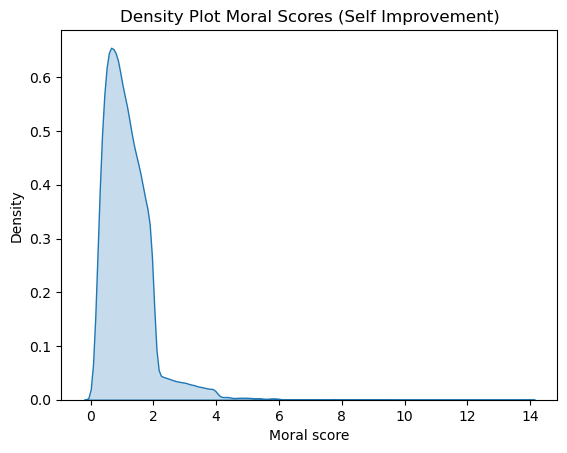

In [68]:
sns.kdeplot(homeowners_nonzero.moral, fill=True)
plt.title('Density Plot Moral Scores (Self Improvement)')
plt.xlabel('Moral score')
plt.ylabel('Density')
plt.show()

Kruskall Wallis

In [69]:
h_stat, p_value = stats.kruskal(selfimprovement_nonzero.moral, homeowners_nonzero.moral, investing_nonzero.moral)
print("H-statistic:", h_stat)
print(f"p-value: {p_value:.2e}")

H-statistic: 2559.7305367324193
p-value: 0.00e+00


Mann Whitney U

In [73]:
# One-tailed test: selfimprovement > homeowners
u_stat, p_value = stats.mannwhitneyu(selfimprovement_nonzero.moral, homeowners_nonzero.moral, alternative='greater')
print(f"Selfimprovement vs Homeowners p-value (greater): {p_value:.2e}")

# One-tailed test: selfimprovement > investing
u_stat, p_value = stats.mannwhitneyu(selfimprovement_nonzero.moral, investing_nonzero.moral, alternative='greater')
print(f"Selfimprovement vs Investing p-value (greater): {p_value:.2e}")

Selfimprovement vs Homeowners p-value (greater): 1.00e+00
Selfimprovement vs Investing p-value (greater): 1.00e+00


## Do it on equal samples

Take samples of selfimprovement and investing to balance the data

In [64]:
selfimprovement_sample = selfimprovement_nonzero.sample(65592, random_state=25)
investing_sample = investing_nonzero.sample(65592, random_state=25)
homeowners_sample = homeowners_nonzero #Reassign just for name consistency

In [65]:
print("selfimprovement:", selfimprovement_sample.shape[0])
print("investing:", investing_sample.shape[0])
print("homeowners:", homeowners_sample.shape[0])

selfimprovement: 65592
investing: 65592
homeowners: 65592


### Observe distributions

/Users/natashacarpcast/anaconda3/envs/macs30112/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


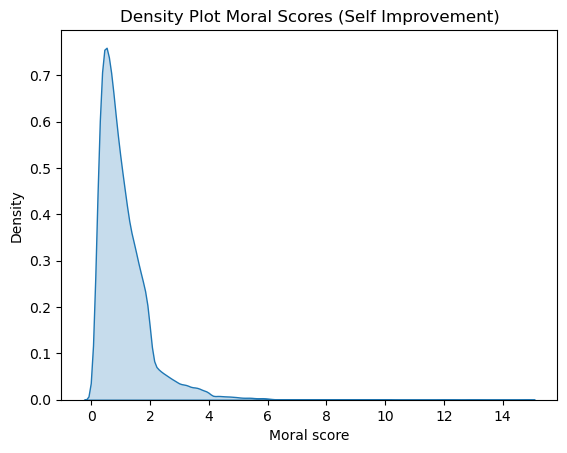

In [39]:
sns.kdeplot(selfimprovement_sample.moral, fill=True)
plt.title('Density Plot Moral Scores (Self Improvement)')
plt.xlabel('Moral score')
plt.ylabel('Density')
plt.show()

/Users/natashacarpcast/anaconda3/envs/macs30112/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


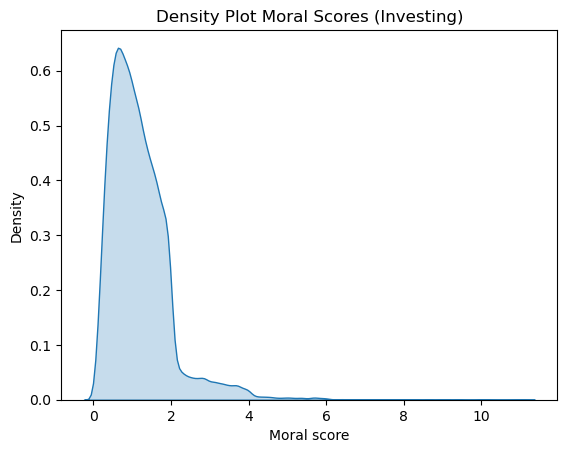

In [40]:
sns.kdeplot(investing_sample.moral, fill=True)
plt.title('Density Plot Moral Scores (Investing)')
plt.xlabel('Moral score')
plt.ylabel('Density')
plt.show()

/Users/natashacarpcast/anaconda3/envs/macs30112/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


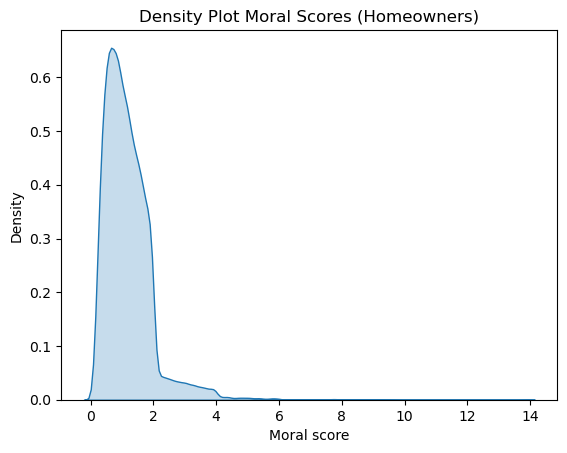

In [41]:
sns.kdeplot(homeowners_sample.moral, fill=True)
plt.title('Density Plot Moral Scores (Homeowners)')
plt.xlabel('Moral score')
plt.ylabel('Density')
plt.show()

In [42]:
percentiles = [25, 50, 75, 99]

# Calculate percentiles for each subreddit
selfimpr_p = np.percentile(selfimprovement_sample.moral, percentiles)
investing_p = np.percentile(investing_sample.moral, percentiles)
homeowners_p = np.percentile(homeowners_sample.moral, percentiles)

# Put results on a df
percentiles_table = pd.DataFrame({
    'Percentile': percentiles,
    'Self-Improvement': selfimpr_p,
    'Investing': investing_p,
    'Homeowners': homeowners_p
})

percentiles_table = percentiles_table.round(3)

print(percentiles_table)

   Percentile  Self-Improvement  Investing  Homeowners
0          25              0.52       0.63       0.650
1          50              0.88       1.03       1.040
2          75              1.43       1.54       1.540
3          99              4.44       4.00       3.951


Kruskall Wallis

In [43]:
h_stat, p_value = stats.kruskal(selfimprovement_sample.moral, homeowners_sample.moral, investing_sample.moral)
print("H-statistic:", h_stat)
print(f"p-value: {p_value:.2e}")

H-statistic: 1629.975399853499
p-value: 0.00e+00


Mann Whitney U

In [44]:
# One-tailed test: selfimprovement > homeowners
u_stat, p_value = stats.mannwhitneyu(selfimprovement_sample.moral, homeowners_sample.moral, alternative='greater')
print(f"Selfimprovement vs Homeowners p-value (greater): {p_value:.2e}")

# One-tailed test: selfimprovement > investing
u_stat, p_value = stats.mannwhitneyu(selfimprovement_sample.moral, investing_sample.moral, alternative='greater')
print(f"Selfimprovement vs Investing p-value (greater): {p_value:.2e}")

Selfimprovement vs Homeowners p-value (greater): 1.00e+00
Selfimprovement vs Investing p-value (greater): 1.00e+00


### Statistical tests (With complete data)

Kruskall wallis between the three subreddits

In [9]:
h_stat, p_value = stats.kruskal(selfimprovement.moral, homeowners.moral, investing.moral)
print("H-statistic:", h_stat)
print(f"p-value: {p_value:.2e}")

H-statistic: 42853.6702055584
p-value: 0.00e+00


There is a large difference in at least one of the subreddits. Now run Mann-Whitney U to see differences on the specific subreddits

In [17]:
# One-tailed test: selfimprovement > homeowners
u_stat, p_value = stats.mannwhitneyu(selfimprovement.moral, homeowners.moral, alternative='greater')
print(f"Selfimprovement vs Homeowners p-value (greater): {p_value:.2e}")

# One-tailed test: selfimprovement > investing
u_stat, p_value = stats.mannwhitneyu(selfimprovement.moral, investing.moral, alternative='greater')
print(f"Selfimprovement vs Investing p-value (greater): {p_value:.2e}")


Selfimprovement vs Homeowners p-value (greater): 0.00e+00
Selfimprovement vs Investing p-value (greater): 0.00e+00


# Try ANOVA

Check variance

In [78]:
data.groupby('Subreddit')['moral'].var()

Subreddit
homeowners         0.241381
investing          0.297560
selfimprovement    0.474709
Name: moral, dtype: float64

In [79]:
from scipy.stats import levene

group1 = data[data['Subreddit'] == 'homeowners']['moral']
group2 = data[data['Subreddit'] == 'investing']['moral']
group3 = data[data['Subreddit'] == 'selfimprovement']['moral']

stat, p = levene(group1, group2, group3)
print(f"Levene’s test p-value: {p}")


Levene’s test p-value: 0.0


### Variances are statistically different. Try Welch's ANOVA

In [80]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('moral ~ C(Subreddit)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2, robust='hc3')
print(anova_table)

                     sum_sq         df            F  PR(>F)
C(Subreddit)    6746.099653        2.0  9970.890157     0.0
Residual      512251.177425  1514238.0          NaN     NaN


In [82]:
# Using statsmodels' pairwise_ttests with unequal variance correction
from statsmodels.stats.multitest import multipletests
from itertools import combinations
from scipy.stats import ttest_ind
import pandas as pd

# Get unique groups
groups = data['Subreddit'].unique()

# Create all group pairs
pairwise_results = []
for g1, g2 in combinations(groups, 2):
    data1 = data[data['Subreddit'] == g1]['score']
    data2 = data[data['Subreddit'] == g2]['score']
    
    # Welch's t-test
    stat, p = ttest_ind(data1, data2, equal_var=False)
    pairwise_results.append((g1, g2, p))

# Adjust p-values for multiple comparisons
pairs, raw_pvals = zip(*[((g1, g2), p) for g1, g2, p in pairwise_results])
_, adj_pvals, _, _ = multipletests(raw_pvals, method='holm')

# Create results table
tukey_like_results = pd.DataFrame({
    'Group 1': [p[0] for p in pairs],
    'Group 2': [p[1] for p in pairs],
    'Raw p-value': raw_pvals,
    'Adjusted p-value (Holm)': adj_pvals,
    'Significant': [p < 0.05 for p in adj_pvals]
})

tukey_like_results


,Group 1,Group 2,Raw p-value,Adjusted p-value (Holm),Significant
0,selfimprovement,investing,9.151627e-96,1.830325e-95,True
1,selfimprovement,homeowners,2.911045e-71,2.911045e-71,True
2,investing,homeowners,3.373150e-246,1.011945e-245,True


Normal ANOVA

In [76]:
from scipy.stats import f_oneway

# Group the data
grouped = [group['moral'].values for _, group in data.groupby('Subreddit')]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*grouped)

print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.4f}")


F-statistic: 11379.135, p-value: 0.0000


In [77]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Example
tukey = pairwise_tukeyhsd(endog=data['moral'], groups=data['Subreddit'], alpha=0.05)
print(tukey)


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1        group2     meandiff p-adj lower  upper  reject
--------------------------------------------------------------
homeowners       investing   0.0377   0.0  0.035 0.0404   True
homeowners selfimprovement   0.1664   0.0 0.1637 0.1691   True
 investing selfimprovement   0.1287   0.0  0.126 0.1314   True
--------------------------------------------------------------


# How is the use of moral language associated with negative emotion in the context of self-improvement?

In [4]:
selfimprovement_moralized = selfimprovement[selfimprovement.moral > 0.25]
selfimprovement_not_moralized = selfimprovement[selfimprovement.moral <= 0.25]

print(selfimprovement_moralized.shape)
print(selfimprovement_not_moralized.shape)

(138853, 31)
(368663, 31)


## Compare emo_neg scores

Get scores

In [8]:
emoneg_moralized = selfimprovement_moralized["emo_neg"]
emoneg_not_moralized = selfimprovement_not_moralized["emo_neg"]

Run Mann Whitney U test

In [9]:
u_stat, p_value = mannwhitneyu(
    emoneg_moralized, 
    emoneg_not_moralized, 
    alternative='greater'
)

print(f"U-statistic: {u_stat}")
print(f"p-value (greater): {p_value:.2e}")

U-statistic: 29251659541.5
p-value (greater): 0.00e+00


Check medians

In [15]:
print("Median emo_neg (moralized posts):", emoneg_moralized.median())
print("Median emo_neg (not moralized posts):", emoneg_not_moralized.median())

Median emo_neg (moralized posts): 0.84
Median emo_neg (not moralized posts): 0.37


Visualize

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_15625/1310022919.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emoneg_moralized, label="Moralized", shade=True)
/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_15625/1310022919.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emoneg_not_moralized, label="Not Moralized", shade=True)


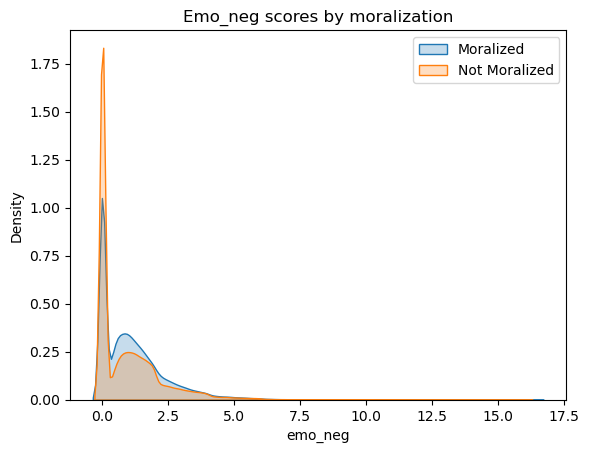

In [21]:
sns.kdeplot(emoneg_moralized, label="Moralized", shade=True)
sns.kdeplot(emoneg_not_moralized, label="Not Moralized", shade=True)
plt.title("Emo_neg scores by moralization")
plt.xlabel("emo_neg")
plt.legend()
plt.show()

## Compare anger scores

In [16]:
emoang_moralized = selfimprovement_moralized["emo_anger"]
emoang_not_moralized = selfimprovement_not_moralized["emo_anger"]

Run Mann Whitney U test

In [17]:
u_stat_ang, p_value_ang = mannwhitneyu(
    emoang_moralized, 
    emoang_not_moralized, 
    alternative='greater'
)

print(f"U-statistic: {u_stat_ang}")
print(f"p-value (greater): {p_value_ang:.2e}")

U-statistic: 28400122240.5
p-value (greater): 0.00e+00


Check distributions

In [19]:
emoang_moralized.describe()

count    138853.000000
mean          0.229045
std           0.592559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.540000
Name: emo_anger, dtype: float64

In [20]:
emoang_not_moralized.describe()

count    368663.000000
mean          0.143516
std           0.519755
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.860000
Name: emo_anger, dtype: float64

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_15625/256405047.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emoang_moralized, label="Moralized", shade=True)
/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_15625/256405047.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emoang_not_moralized, label="Not Moralized", shade=True)


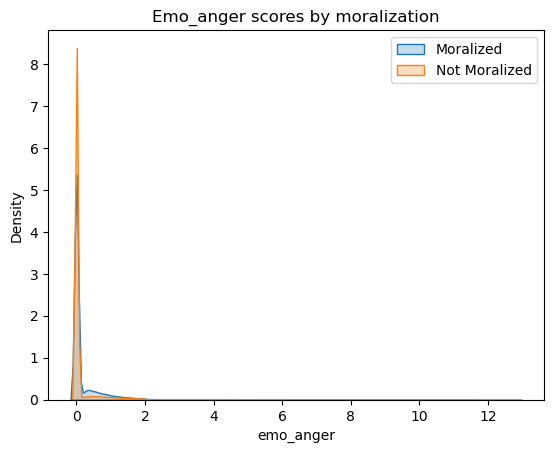

In [22]:
sns.kdeplot(emoang_moralized, label="Moralized", shade=True)
sns.kdeplot(emoang_not_moralized, label="Not Moralized", shade=True)
plt.title("Emo_anger scores by moralization")
plt.xlabel("emo_anger")
plt.legend()
plt.show()